# ASTRSC: Analyzing Tropes

## Overview

After thorough discussion, the Astrsc team has expressed interest to prioritize the following four tropes to provide them with clearly demarkated definitions and categories. This notebook will explore the existing words under each of these tropes, their strengths, and their limitations.

**Target Tropes**:
1. Generalization
2. Wildlife and Nature
3. Tribalism
4. Conflict and violence

_Note_: This notebook losely follows [this article](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0).

## Part I: Prepare Inputs

### Map Target Tropes to Existng Tropes

Here are the existing tropes:

In [1]:
archaismArray = ["primitive", "archaic", "savage", "traditional" , "ancestral", "wild", "barbaric", "underdeveloped", "exotic", "third world", "witchcraft"]

tribalismArray = ["tribe", "tribal", "tribalism", "tribalistic", "ethnic", "ethnicity"]

corruptionArray = ["regime","regimes","dictator","dictators","strongman","strongmen","corrupt","corruption"]

generalizationArray = ["africa","african", "subsaharan africa","sub-saharan africa","continent"]

lightArray = ["sunset","sunrise","sunshine","sunlight","sun","glow","light"]

natureArray = ["savannah","rain forest","jungle","trees","insect","lion","rhino","hunt","big game"]

darknessArray = ["darkness","dark continent","darkest","bleak","hopeless","devastated","ridden","famine","hunger","starvation","disease","epidemic","child soldier","hiv","ebola","rebels","guerilla","war","conflict","armed","weapon","pirate","attack","kill","death","dead","murder","fear","menace","drought","smuggled weapons","smugglers","crime","gang","poor","desperate","ransom","execution","shot","death","pain","suffer","civil war","chaos","refugees","gun","gunshot"]



We will map the target tropes to these existing tropes as follows:


| Target      | Existing |
| ----------- | ----------- |
| Conflict      | Part of darknessArray       |
| Generalization   | generalizationArray        |
| Tribalism  | tribalismArray     |
| Wildlife  |  natureArray      |

Here are the resulting tropes in dictionary format for ease of operation in python.

In [2]:
conflictArray = {"war","conflict","armed","weapon","pirate","attack","kill","death","dead","murder","fear","menace","smuggled weapons","smugglers","crime","gang","ransom","execution","shot","death","pain","suffer","civil war","chaos","gun","gunshot"}
generalizationArray = {"africa","african", "subsaharan africa","sub-saharan africa","continent"}
tribalismArray = {"tribe", "tribal", "tribalism", "tribalistic", "ethnic", "ethnicity"}
wildlifeArray = {"savannah","rain forest","jungle","trees","insect","lion","rhino","hunt","big game"}


In [3]:
# Let's store all the tropes in a dictionary so that we can easily iterate over them later

all_tropes_dict = {"conflictArray":conflictArray, "generalizationArray":generalizationArray, "tribalismArray":tribalismArray, "wildlifeArray":wildlifeArray}

#all_tropes_dict = {"generalizationArray":generalizationArray, "tribalismArray":tribalismArray, "wildlifeArray":wildlifeArray}


{'generalizationArray': {'africa',
  'african',
  'continent',
  'sub-saharan africa',
  'subsaharan africa'}}

In [25]:
# Let's count how many words are under each trope
for trope in all_tropes_dict.keys():
    print(len(all_tropes_dict[trope]), "words under", str(trope))

5 words under generalizationArray
6 words under tribalismArray
9 words under wildlifeArray


In [26]:
# Let's create a collection of all the words in all the tropes so that we can identify emerging topics amongst them
all_words = []
for trope in all_tropes_dict.values():
    for word in trope:
        all_words.append(word)


## Part II: Initiate LDA Topic Modeling

In [12]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Let's plot and check the top 10 most repeated words

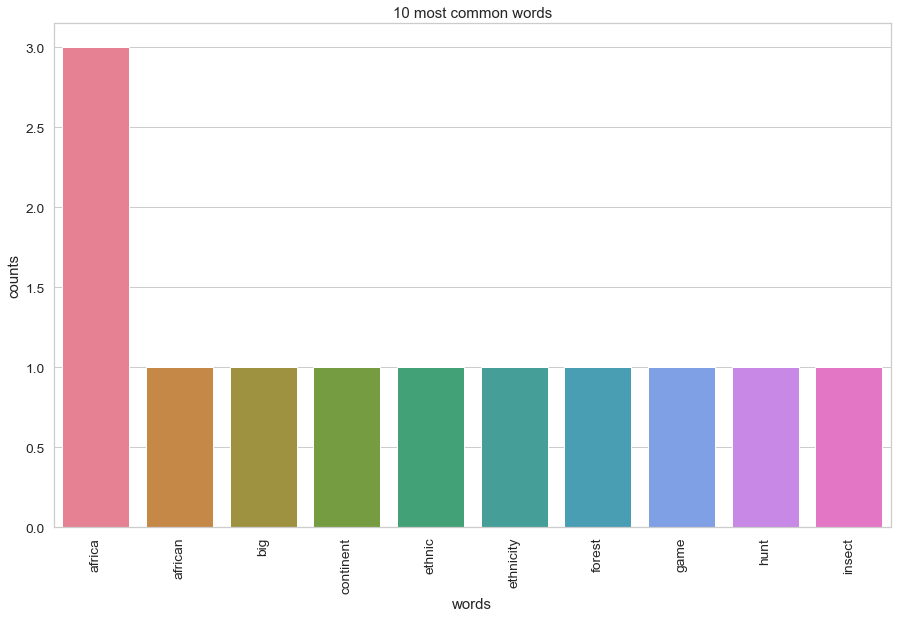

In [27]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(all_words)# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Notice how the top 10 words are the ones we expected such as "africa"

#### Now, let's identify emerging topics amongst the words

In [30]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning) # Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below
number_topics = 2
number_words = 20 # Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)  

lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
game big ethnicity insect tribe african continent tribalistic hunt lion ethnic jungle tribal savannah tribalism rhino trees africa forest rain

Topic #1:
africa sub saharan subsaharan rain forest trees rhino tribalism savannah tribal jungle ethnic lion hunt tribalistic continent african tribe insect


In [29]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1: 
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

pyLDAvis.display(LDAvis_prepared)
    

/Users/tsiontesfaye/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## Part III: Compare LDA Output to Original Input

**Observation**:

Let's compare our input tropes and the LDA determined tropes.

Input:


In [30]:
conflictArray = {"war","conflict","armed","weapon","pirate","attack","kill","death","dead","murder","fear","menace","smuggled weapons","smugglers","crime","gang","ransom","execution","shot","death","pain","suffer","civil war","chaos","gun","gunshot"}
generalizationArray = {"africa","african", "subsaharan africa","sub-saharan africa","continent"}
tribalismArray = {"tribe", "tribal", "tribalism", "tribalistic", "ethnic", "ethnicity"}
wildlifeArray = {"savannah","rain forest","jungle","trees","insect","lion","rhino","hunt","big game"}


LDA Determined:
    

Topic #0:
rain forest hunt jungle murder ethnic tribal fear death ethnicity tribe weapon war continent menace african tribalism gang dead pirate

Topic #1:
africa war saharan sub subsaharan game big civil dead tribalism continent gang african menace tribe weapon death ethnicity fear ethnic

Topic #2:
weapons smuggled shot suffer tribalistic gunshot crime smugglers gun ransom execution pirate war menace tribalism gang continent dead african weapon

Topic #3:
attack rhino kill armed insect conflict pain trees lion savannah chaos war menace african gang tribalism continent dead tribe weapon
Maybe we could name:

* Topic 0 = Wildlife
* Topic 1 = Generalization
* Topic 2 = War/conflict
* Topic 3 = Wildlife + Conflict

**These four categories have high overlap. Consider 3 categories:**

Topic #0:
ethnicity gun hunt kill tribalism pirate menace ransom crime tribe african trees pain chaos weapon armed fear shot continent tribal

Topic #1:
war civil big game forest rain murder insect lion tribalistic conflict gang dead savannah gunshot shot tribal continent fear armed

Topic #2:
africa saharan sub subsaharan smuggled weapons death rhino suffer smugglers attack ethnic jungle execution chaos weapon armed fear tribal continent

Maybe we could name:

* Topic 0 = War
* Topic 1 = Wildlife
* Topic 2 = Generalization

**Conclusion**

We recommend the use of three tropes instead of 4 since the words seem to overlap.

~~ End of Notebook ~~